🚀 Используется устройство: cuda
✅ CLIP модель загружена!

🔍 Анализ изображения 1...


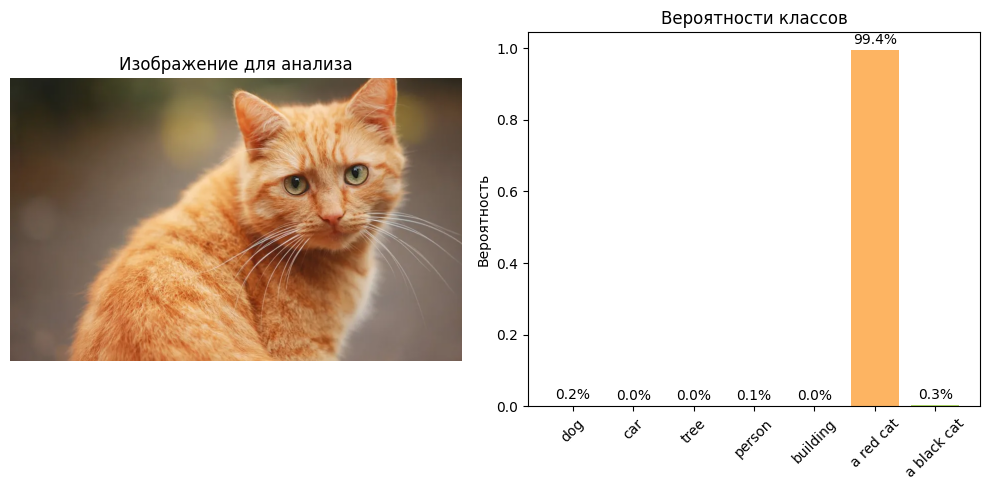

🎯 Результат: a red cat (уверенность: 99.41%)

🔍 Анализ изображения 2...


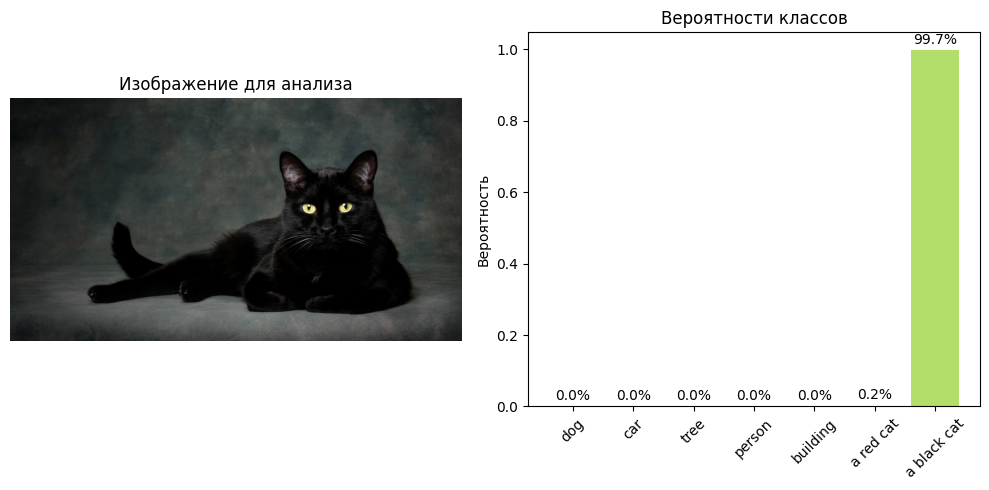

🎯 Результат: a black cat (уверенность: 99.74%)


In [10]:
# Установи библиотеки если нужно
# !pip install requests matplotlib torch transformers

import torch
from transformers import CLIPModel, CLIPProcessor
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Автоматически выбираем устройство
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Используется устройство: {device}")

# Загружаем модель и процессор
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

print("✅ CLIP модель загружена!")

def classify_image_from_url(image_url, classes):
    """Классификация изображения по URL"""
    
    # Загружаем изображение из интернета
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    # Подготавливаем текстовые описания классов
    text_descriptions = [f"a photo of a {cls}" for cls in classes]
    
    # Обрабатываем данные
    inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Получаем предсказания
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)[0]
    
    # Выводим результаты
    plt.figure(figsize=(10, 5))
    
    # Показываем изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Изображение для анализа")
    
    # Показываем вероятности
    plt.subplot(1, 2, 2)
    colors = plt.cm.Set3(range(len(classes)))
    bars = plt.bar(range(len(classes)), probs.cpu().numpy(), color=colors)
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.title("Вероятности классов")
    plt.ylabel("Вероятность")
    
    # Добавляем значения на столбцы
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{prob:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Возвращаем лучший класс
    best_idx = probs.argmax().item()
    return classes[best_idx], probs[best_idx].item()

# 🎯 ТЕСТИРУЕМ!
test_urls = [
    "https://wallpapers.com/images/high/cat-pictures-zc3gu0636kmldm04.webp", # Рыжий кот
    "https://www.letribunaldunet.fr/wp-content/uploads/2020/11/superstitions-chat-noir.jpg.webp",  # черный кот
    #"https://i.pinimg.com/originals/c0/03/44/c003441c63f20a2af76620d157c20ec8.jpg",  # собака
    # "https://images.unsplash.com/photo-1503376780353-7e6692767b70?w=400",  # машина
]

#classes = ["cat", "dog", "car", "tree", "person", "building", "a red cat"]
classes = ["dog", "car", "tree", "person", "building", "a red cat", "a black cat"]

# for i, url in enumerate(test_urls[:1]):  # протестируем первую
#     print(f"\n🔍 Анализ изображения {i+1}...")
#     best_class, confidence = classify_image_from_url(url, classes)
#     print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")

# ИСПРАВЛЕННАЯ СТРОКА - убрали [:1]
for i, url in enumerate(test_urls):  # теперь протестируем все
    print(f"\n🔍 Анализ изображения {i+1}...")
    best_class, confidence = classify_image_from_url(url, classes)
    print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")    